#**Handwritten Digit Classification With Neural Network From Scratch**
This notebook demonstrates the implementation of a simple neural network from scratch in Python to classify handwritten digits using the MNIST dataset. We'll build the model step by step, explaining each process in detail.

## **Import Required Libraries**
We will use the following libraries:
- `numpy` for numerical computations
- `pandas` for data manipulation
- `matplotlib` for visualization
- `google.colab.files` to upload the dataset


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files


## **Upload the Dataset**
Upload the `train.csv` file containing the MNIST dataset. Once uploaded, it will be used for training and testing the neural network.

In [2]:
uploaded = files.upload()


Saving train.csv to train.csv


## **Load and Preprocess Data**
- Load the dataset using `pandas`.
- Normalize the pixel values to be in the range [0, 1].
The dataset is split into training and development sets for model training and validation:

- `data = np.array(data)`: Converts the pandas DataFrame to a NumPy array for easier manipulation.
- `m, n = data.shape`: `m` represents the number of samples (rows), and `n` represents the number of features (columns) in the dataset.
- `np.random.shuffle(data)`: Shuffles the dataset randomly to ensure that the training and validation data are not biased.

The development set (used for validation) and training set (used for learning) are then created:
- `data_dev = data[0:1000].T`: The first 1000 samples are assigned to the development set.
- `data_train = data[1000:m].T`: The remaining samples are assigned to the training set.

Both the training and development data are normalized by dividing the feature values by 255:
- `X_dev = X_dev / 255.`
- `X_train = X_train / 255.`

In [55]:
data = pd.read_csv("train.csv")
data = np.array(data)

# Shuffle the data
np.random.shuffle(data)
# Optionally set a seed for reproducibility:
# np.random.seed(42)

# Separate development data (first 1000 examples) and training data (rest of the data)
data_dev = data[0:1000].T  # First 1000 examples
Y_dev = data_dev[0]        # Labels for development data
X_dev = data_dev[1:] / 255.0  # Features for development data (scaled)

data_train = data[1000:].T  # Remaining examples
Y_train = data_train[0]     # Labels for training data
X_train = data_train[1:] / 255.0  # Features for training data (scaled)

# Shape of training data
_, m_train = X_train.shape

## **Initialize Parameters**
Initialize weights and biases for the two-layer neural network.
- `W1, b1, W2, b2`: These are the weight matrices and bias vectors for two layers of the neural network. They are initialized randomly with small values using `np.random.rand()`.



In [37]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


## **Define Activation Functions**
We define several functions to carry out the forward and backward passes in the neural network:

- **ReLU Activation Function** (`ReLU` and `ReLU_deriv`): The ReLU function introduces non-linearity by outputting the input if it's positive or zero otherwise. The derivative (`ReLU_deriv`) is used during the backpropagation step.
- **Softmax Activation Function** (`softmax`): This function converts the raw output of the network into a probability distribution, so the output sums to 1.



In [38]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


## **Forward Propagation**
Forward propagation computes the output of the neural network given an input:

- `Z1 = W1.dot(X) + b1`: Computes the linear combination of inputs and weights for the first layer.
- `A1 = ReLU(Z1)`: Applies the ReLU activation to the output of the first layer.
- `Z2 = W2.dot(A1) + b2`: Computes the linear combination for the second layer.
- `A2 = softmax(Z2)`: Applies the softmax function to get the output probabilities for each class.


In [39]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


## **Backward Propagation**
This step computes the gradients of the loss function with respect to the parameters (weights and biases) and updates the parameters:

- **Loss Calculation**: The difference between the predicted probabilities (`A2`) and the true labels (`one_hot_Y`) is computed using `dZ2 = A2 - one_hot_Y`.
- **Gradients**: The gradients of the loss with respect to weights and biases are calculated using the chain rule. These are used to adjust the parameters:
  - `dW2`, `db2`, `dW1`, `db1`: Gradients for weights and biases in the second and first layers.
  

In [26]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1)
    return dW1, db1, dW2, db2


## **Update Parameters**
Once the gradients are calculated, we update the weights and biases of the model:
- **`W1 = W1 - alpha * dW1`**: The weights for the first layer are updated by subtracting the gradient scaled by the learning rate (`alpha`).
- **`b1 = b1 - alpha * db1`**: Similarly, the biases for the first layer are updated.
- **`W2 = W2 - alpha * dW2`**: The weights for the second layer are updated.
- **`b2 = b2 - alpha * db2`**: The biases for the second layer are updated.

This process ensures that the model learns by reducing the error across all layers through gradient descent.

In [40]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

## **Accuracy and Prediction Code**

The following code is responsible for calculating the predictions of the neural network and checking its accuracy.

1. **`get_predictions` Function:**
   This function takes the output of the final layer of the neural network (`A2`) and returns the predicted class (index) by selecting the class with the highest predicted probability.

2. **`get_accuracy` Function:** The **`get_accuracy`** function calculates the accuracy of the model by comparing the predicted classes with the true labels (`Y`). It returns the fraction of correct predictions.

In [41]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)


## **Train the Model**
 we train the model using the gradient descent algorithm over multiple iterations:
- **`for i in range(iterations)`**: Iterates through the training data multiple times.
- During each iteration, the network computes predictions, calculates gradients, and updates parameters.
the parameters (weights and biases) are updated using gradient descent:

- `W1 = W1 - alpha * dW1`: Weights in the first layer are updated by subtracting the learning rate (`alpha`) multiplied by the gradient.
- `b1 = b1 - alpha * db1`: Biases in the first layer are similarly updated.
- The same update process is applied to the second layer parameters (`W2`, `b2`).
- Every 10th iteration prints the accuracy to show the progress.

In [42]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            print("Iteration:", i, "Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


## **Test the Model**
Test the model on some training samples and visualize the results.


Iteration: 0 Accuracy: 0.09402439024390244
Iteration: 10 Accuracy: 0.14682926829268292
Iteration: 20 Accuracy: 0.2228048780487805
Iteration: 30 Accuracy: 0.2931951219512195
Iteration: 40 Accuracy: 0.3524390243902439
Iteration: 50 Accuracy: 0.40295121951219515
Iteration: 60 Accuracy: 0.4516829268292683
Iteration: 70 Accuracy: 0.49773170731707317
Iteration: 80 Accuracy: 0.5405853658536586
Iteration: 90 Accuracy: 0.5780975609756097
Iteration: 100 Accuracy: 0.6108780487804878
Iteration: 110 Accuracy: 0.640609756097561
Iteration: 120 Accuracy: 0.6633902439024391
Iteration: 130 Accuracy: 0.684219512195122
Iteration: 140 Accuracy: 0.7015365853658536
Iteration: 150 Accuracy: 0.7177073170731707
Iteration: 160 Accuracy: 0.7301707317073171
Iteration: 170 Accuracy: 0.7399512195121951
Iteration: 180 Accuracy: 0.7492682926829268
Iteration: 190 Accuracy: 0.7585121951219512
Iteration: 200 Accuracy: 0.7658536585365854
Iteration: 210 Accuracy: 0.7730243902439025
Iteration: 220 Accuracy: 0.77848780487804

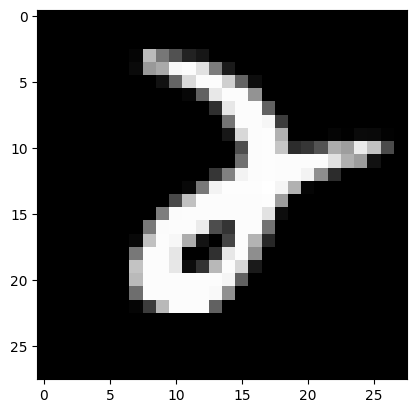

Prediction: [2]
Label: 2


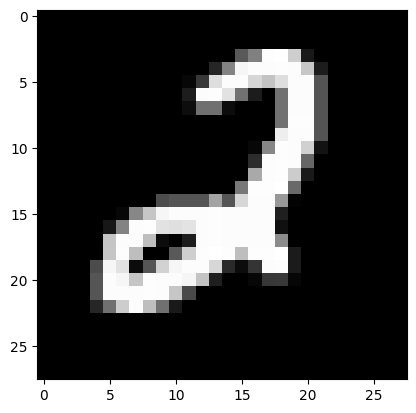

In [43]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)  # Forward propagation
    predictions = get_predictions(A2)  # Get predicted class labels
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)


## **Evaluate the Model on Test Set**
In this section a function `evaluate_on_test_set`  that performs the following:

1. **Forward Pass**: It passes the test data (`X_test`) through the trained neural network to generate predictions.
2. **Prediction & Accuracy**: It calculates the predicted labels and compares them with the true labels (`Y_test`) to compute the accuracy.
3. **Display Results**:
   - For each test sample, it displays the image along with its true label and the model’s predicted label.
   - This helps us visually inspect how well the model is performing on each test image.

The function will loop through all the test data, print the labels, predictions, and show the corresponding image. Finally, it will print the **overall accuracy** of the model on the test set.


Test Accuracy: 88.00%
Image 1:
True Label: 7, Predicted Label: 7


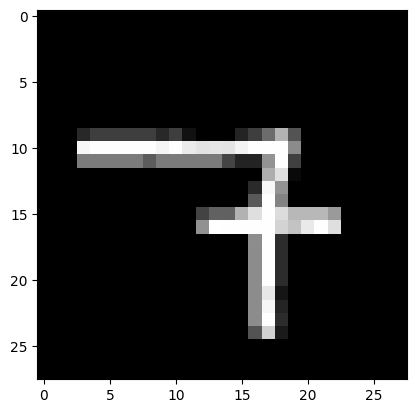

Image 2:
True Label: 2, Predicted Label: 2


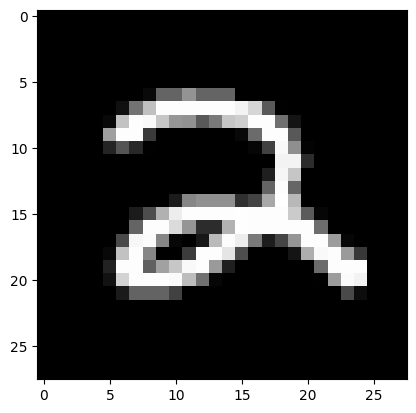

Image 3:
True Label: 8, Predicted Label: 8


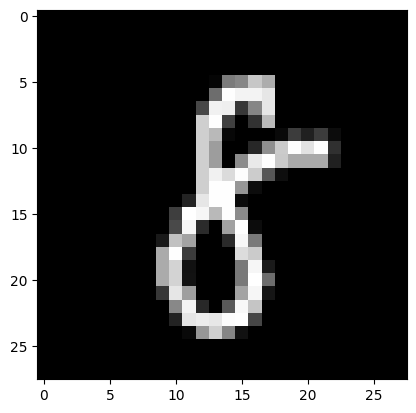

Image 4:
True Label: 4, Predicted Label: 4


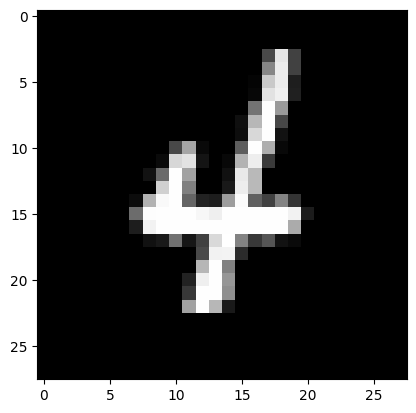

Image 5:
True Label: 9, Predicted Label: 9


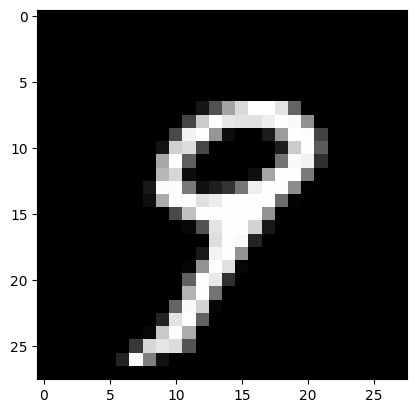

Image 6:
True Label: 7, Predicted Label: 7


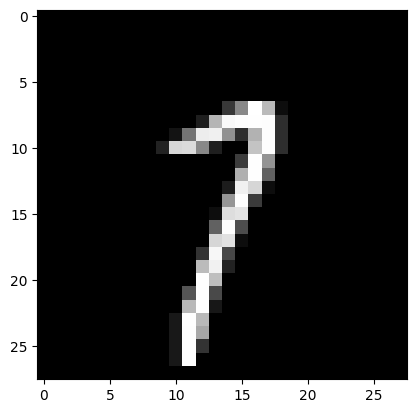

Image 7:
True Label: 5, Predicted Label: 0


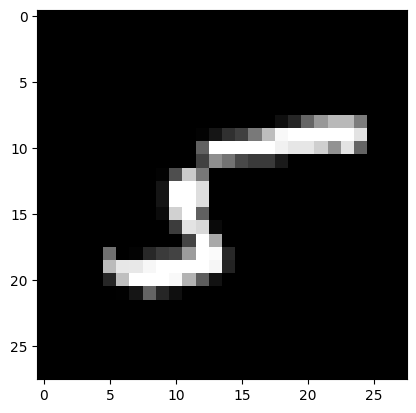

Image 8:
True Label: 3, Predicted Label: 3


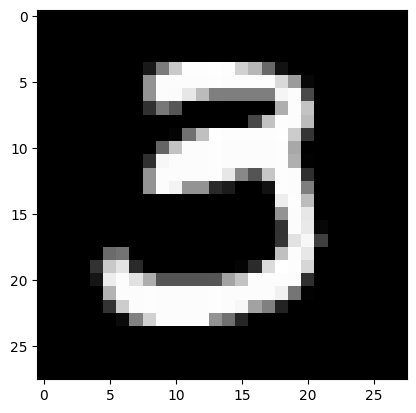

Image 9:
True Label: 8, Predicted Label: 8


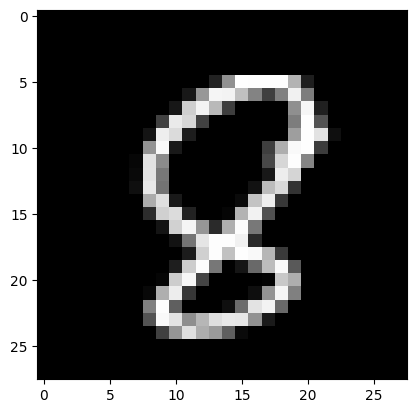

Image 10:
True Label: 7, Predicted Label: 0


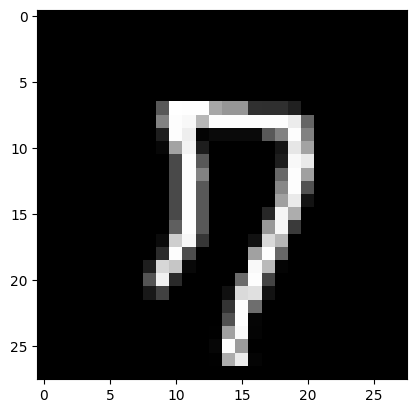

Image 11:
True Label: 5, Predicted Label: 5


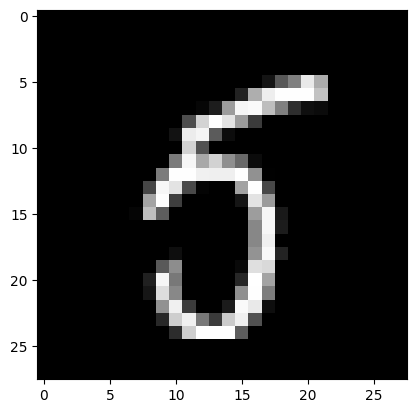

Image 12:
True Label: 7, Predicted Label: 7


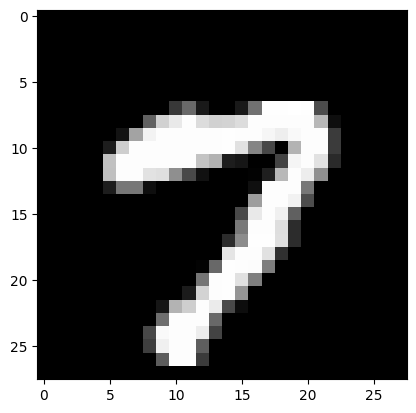

Image 13:
True Label: 6, Predicted Label: 6


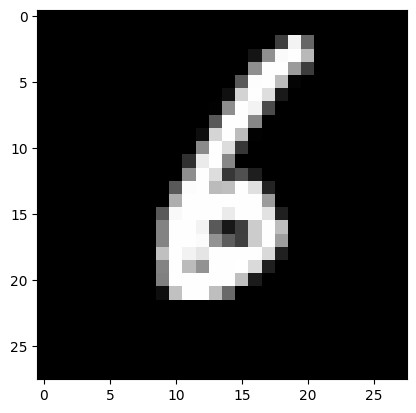

Image 14:
True Label: 8, Predicted Label: 8


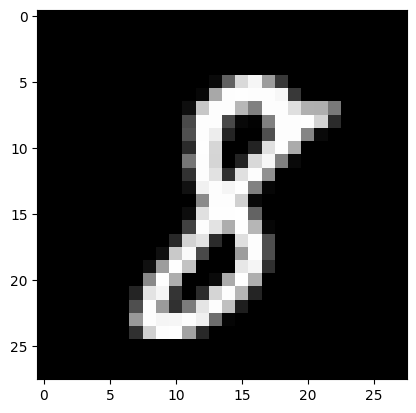

Image 15:
True Label: 1, Predicted Label: 1


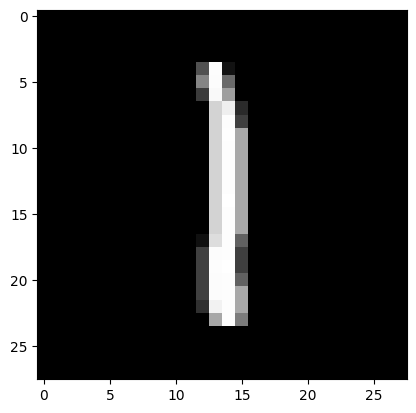

Image 16:
True Label: 3, Predicted Label: 3


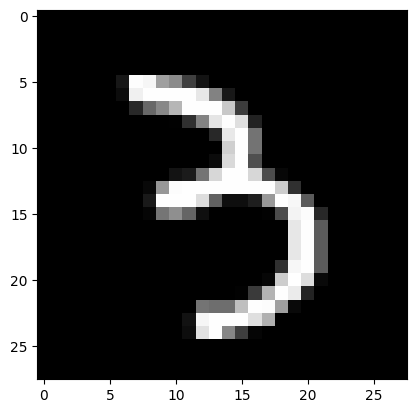

Image 17:
True Label: 4, Predicted Label: 4


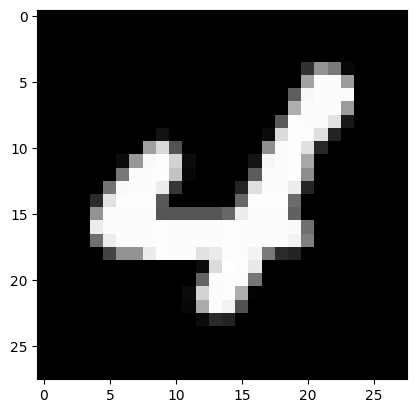

Image 18:
True Label: 8, Predicted Label: 8


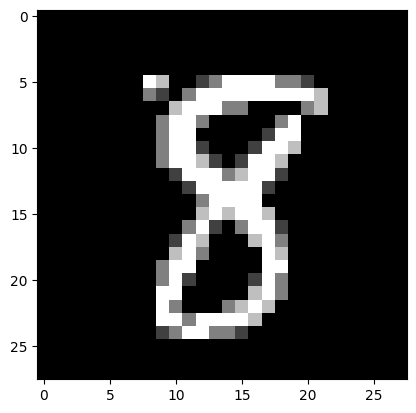

Image 19:
True Label: 4, Predicted Label: 4


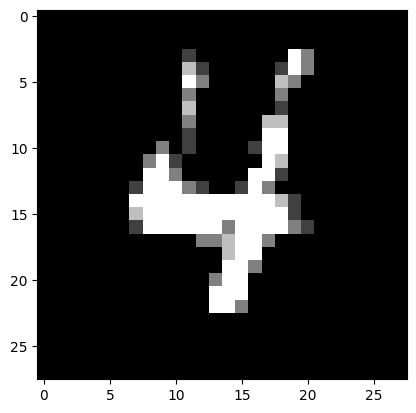

Image 20:
True Label: 6, Predicted Label: 6


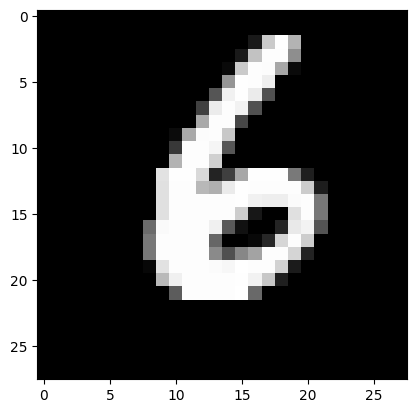

Image 21:
True Label: 3, Predicted Label: 3


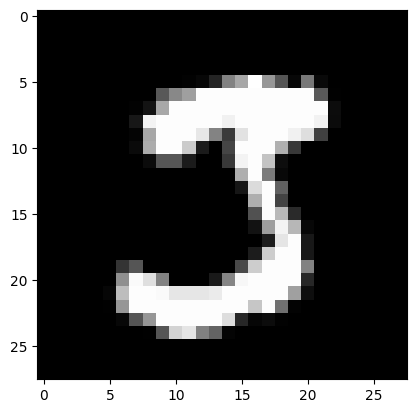

Image 22:
True Label: 6, Predicted Label: 6


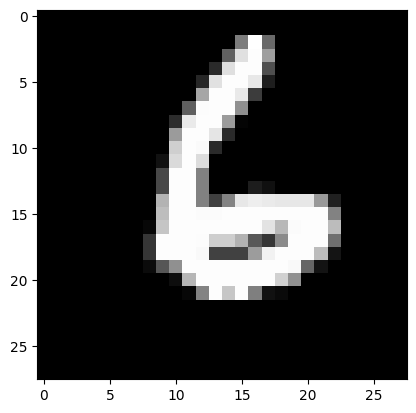

Image 23:
True Label: 1, Predicted Label: 1


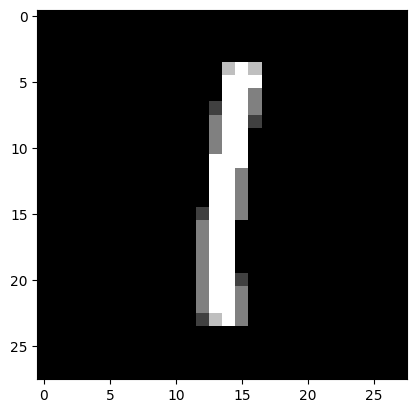

Image 24:
True Label: 4, Predicted Label: 4


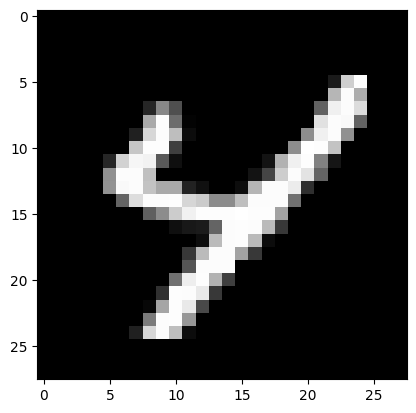

Image 25:
True Label: 4, Predicted Label: 4


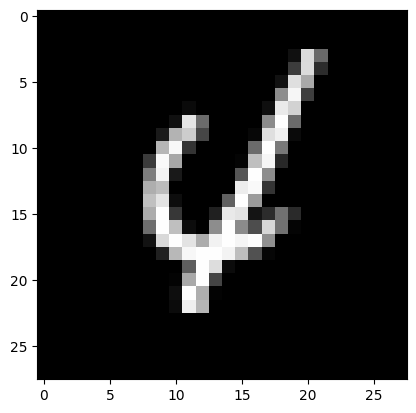

Image 26:
True Label: 4, Predicted Label: 4


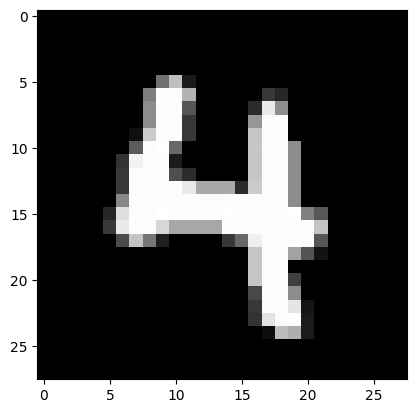

Image 27:
True Label: 1, Predicted Label: 1


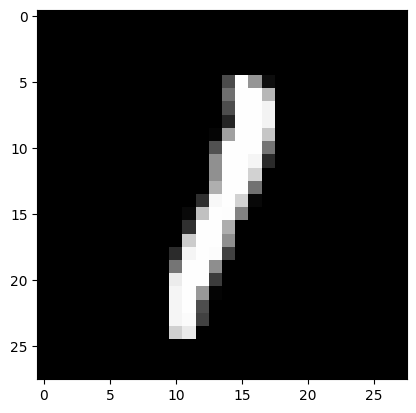

Image 28:
True Label: 4, Predicted Label: 9


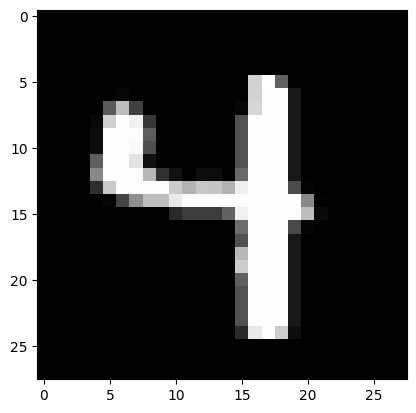

Image 29:
True Label: 5, Predicted Label: 5


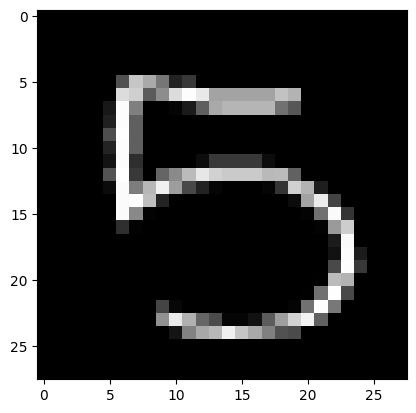

Image 30:
True Label: 9, Predicted Label: 9


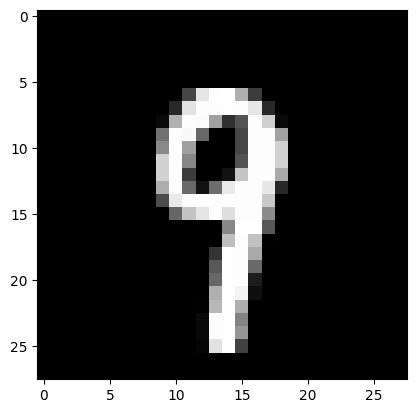

Image 31:
True Label: 9, Predicted Label: 9


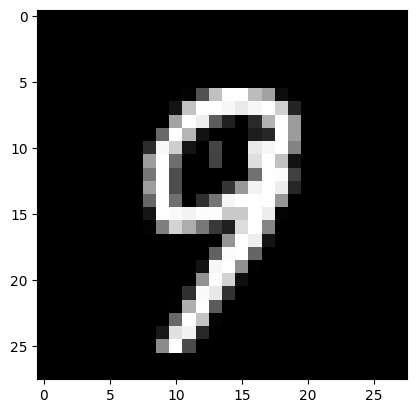

Image 32:
True Label: 9, Predicted Label: 9


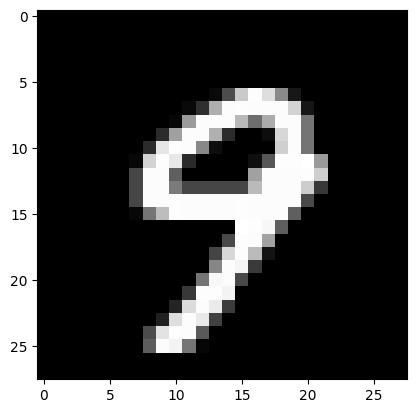

Image 33:
True Label: 7, Predicted Label: 7


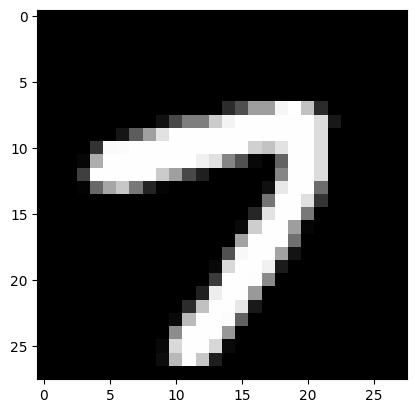

Image 34:
True Label: 3, Predicted Label: 3


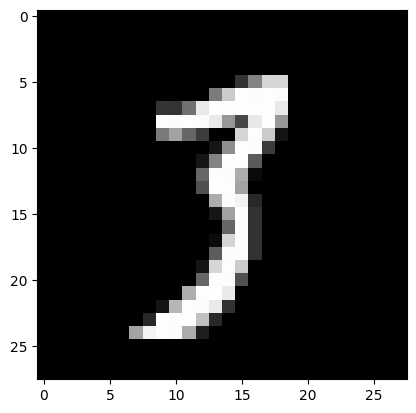

Image 35:
True Label: 1, Predicted Label: 1


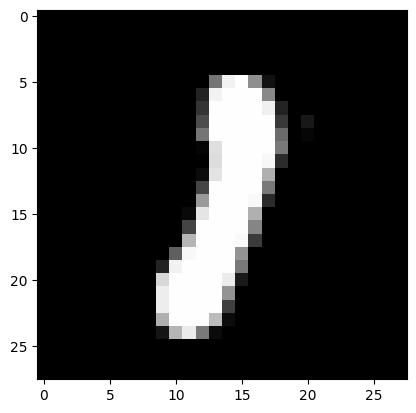

Image 36:
True Label: 1, Predicted Label: 1


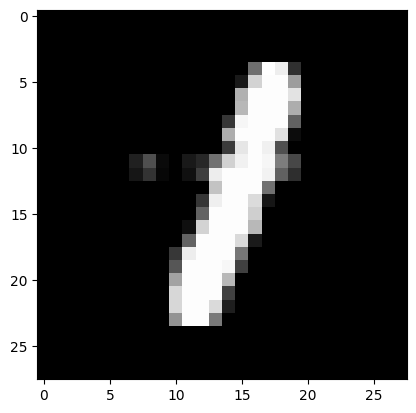

Image 37:
True Label: 5, Predicted Label: 5


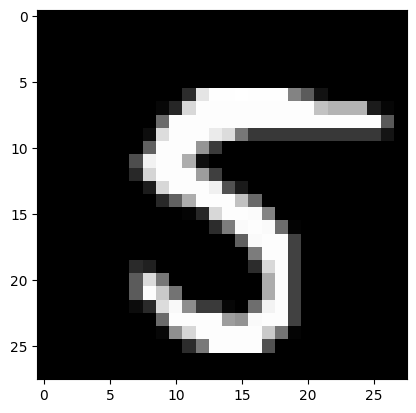

Image 38:
True Label: 8, Predicted Label: 8


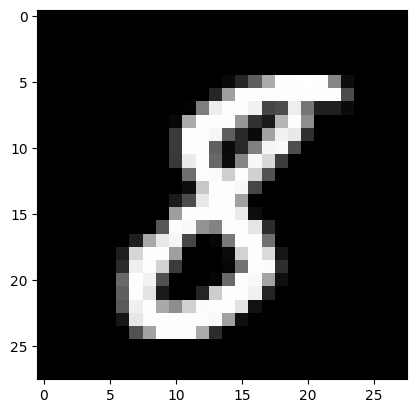

Image 39:
True Label: 7, Predicted Label: 7


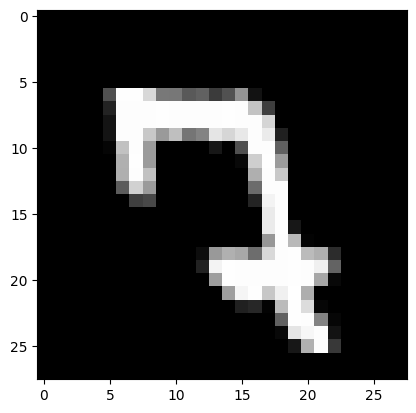

Image 40:
True Label: 7, Predicted Label: 7


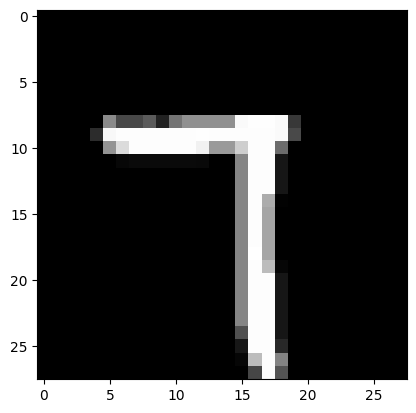

Image 41:
True Label: 1, Predicted Label: 1


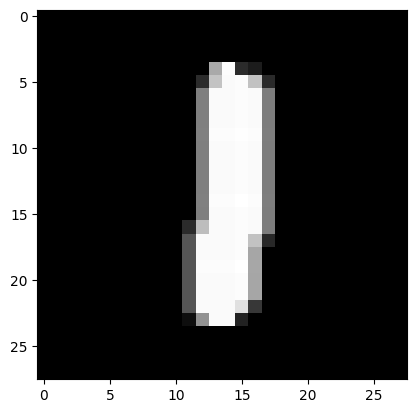

Image 42:
True Label: 3, Predicted Label: 2


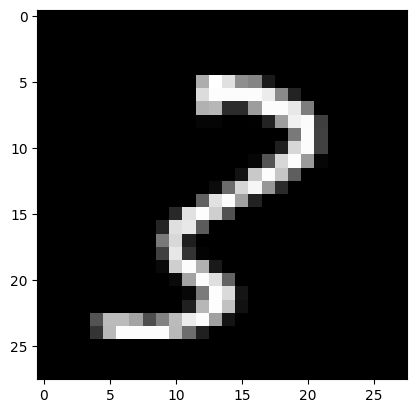

Image 43:
True Label: 8, Predicted Label: 8


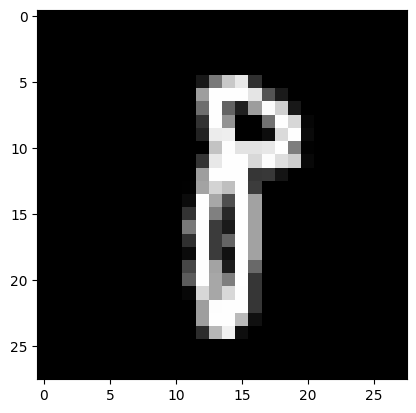

Image 44:
True Label: 9, Predicted Label: 7


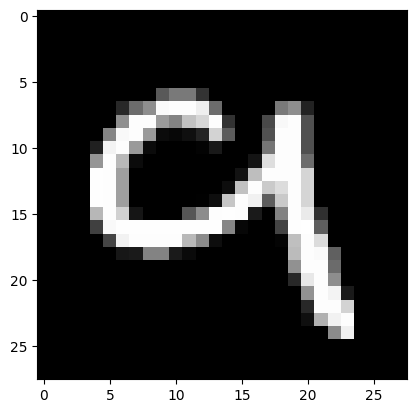

Image 45:
True Label: 6, Predicted Label: 6


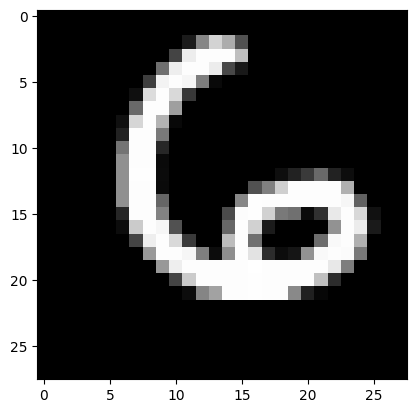

Image 46:
True Label: 2, Predicted Label: 6


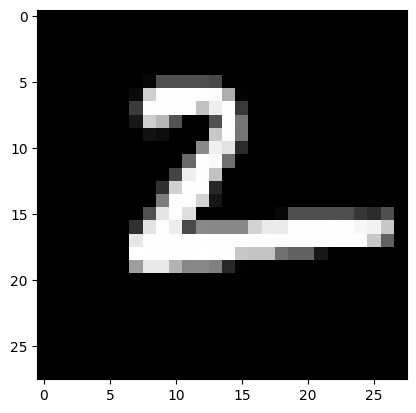

Image 47:
True Label: 5, Predicted Label: 5


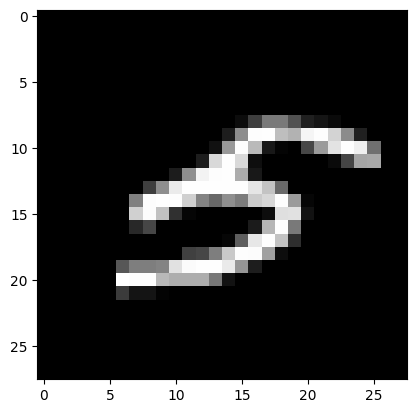

Image 48:
True Label: 9, Predicted Label: 2


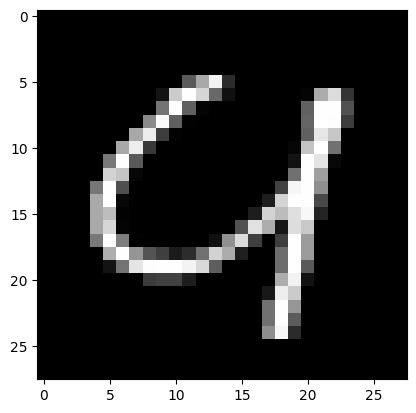

Image 49:
True Label: 8, Predicted Label: 8


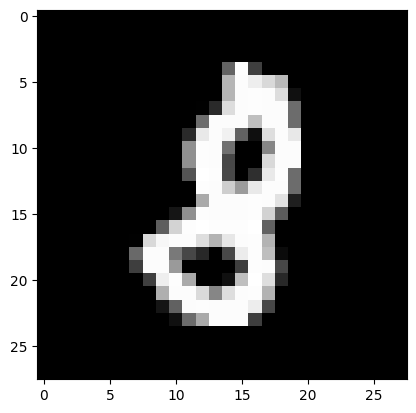

Image 50:
True Label: 6, Predicted Label: 6


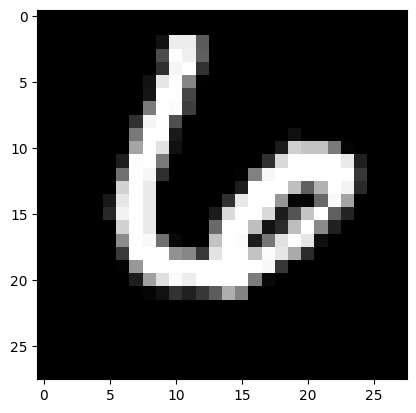

Image 51:
True Label: 3, Predicted Label: 3


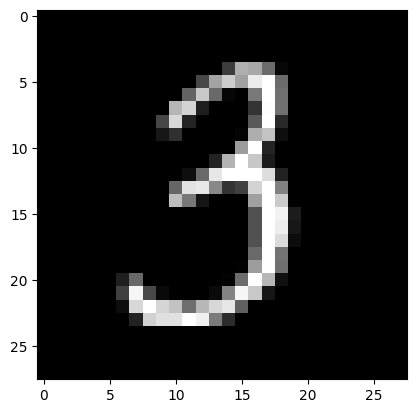

Image 52:
True Label: 1, Predicted Label: 1


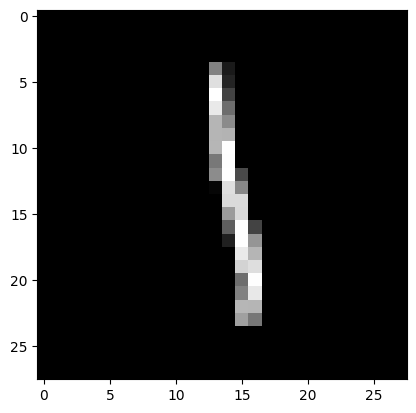

Image 53:
True Label: 8, Predicted Label: 8


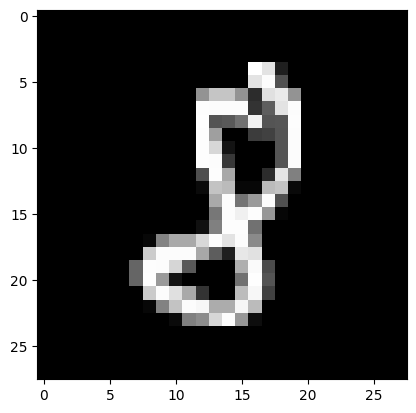

Image 54:
True Label: 9, Predicted Label: 9


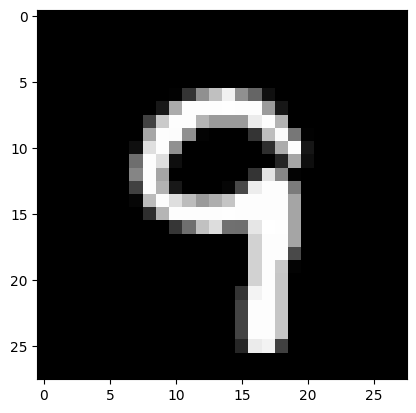

Image 55:
True Label: 0, Predicted Label: 0


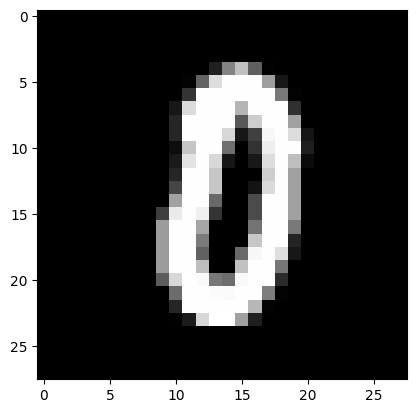

Image 56:
True Label: 6, Predicted Label: 6


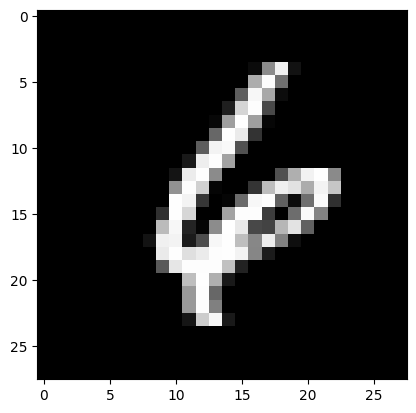

Image 57:
True Label: 0, Predicted Label: 0


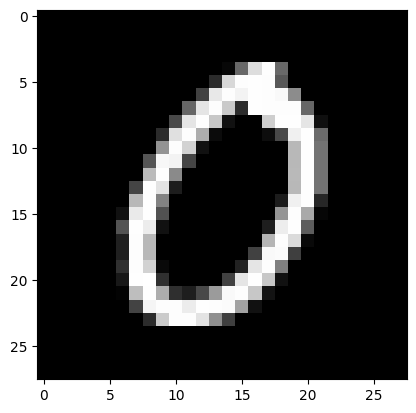

Image 58:
True Label: 8, Predicted Label: 8


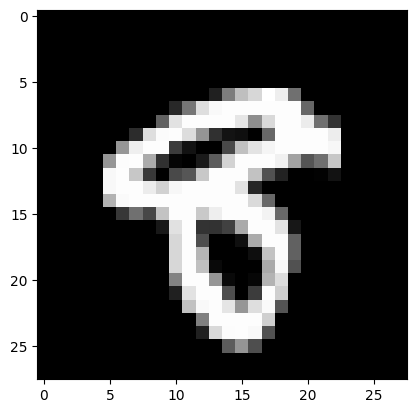

Image 59:
True Label: 2, Predicted Label: 6


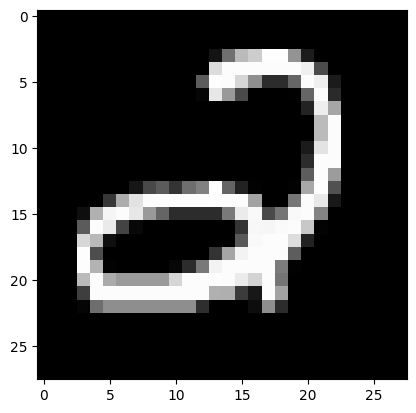

Image 60:
True Label: 4, Predicted Label: 4


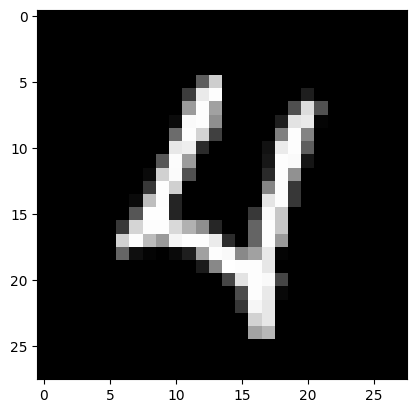

Image 61:
True Label: 6, Predicted Label: 6


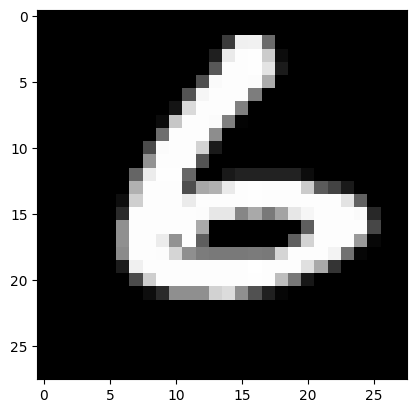

Image 62:
True Label: 0, Predicted Label: 0


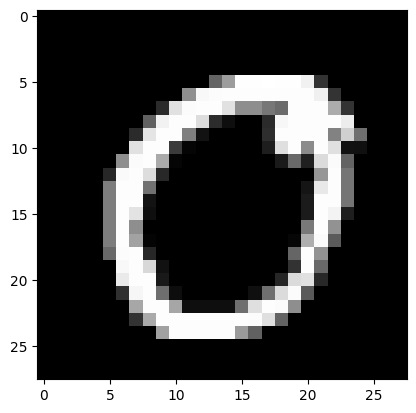

Image 63:
True Label: 2, Predicted Label: 2


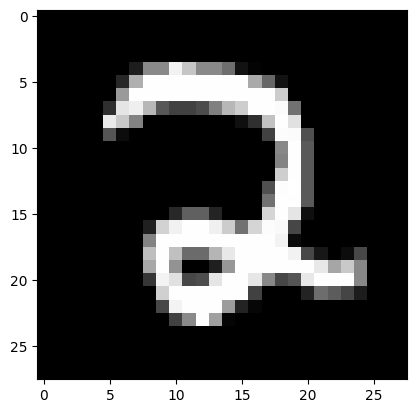

Image 64:
True Label: 8, Predicted Label: 8


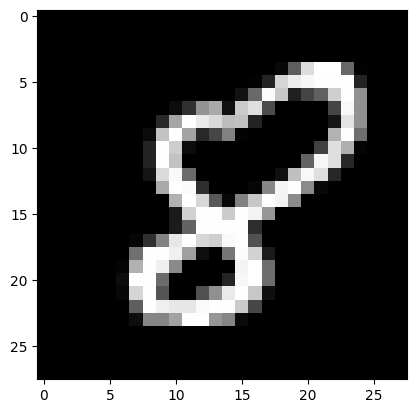

Image 65:
True Label: 0, Predicted Label: 0


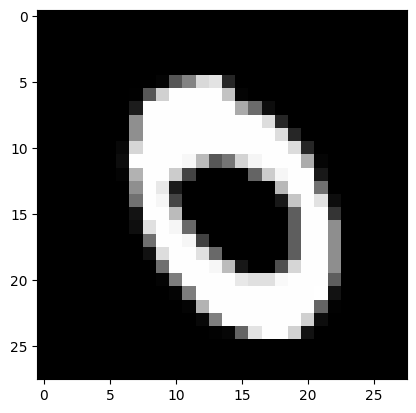

Image 66:
True Label: 9, Predicted Label: 9


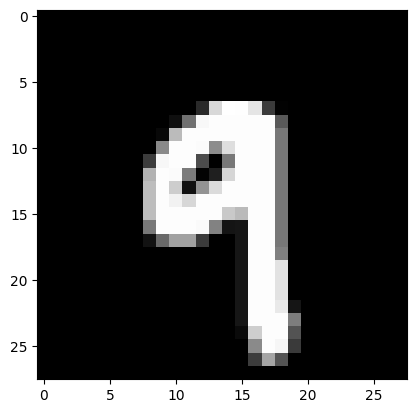

Image 67:
True Label: 9, Predicted Label: 9


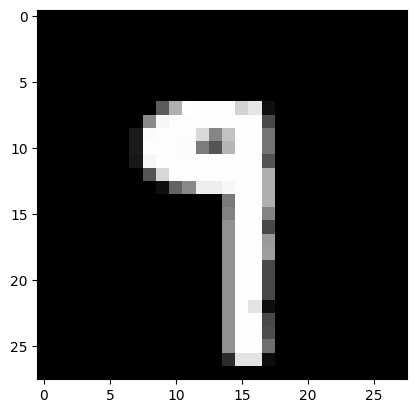

Image 68:
True Label: 7, Predicted Label: 0


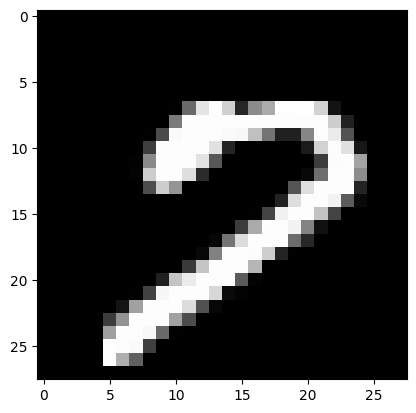

Image 69:
True Label: 2, Predicted Label: 2


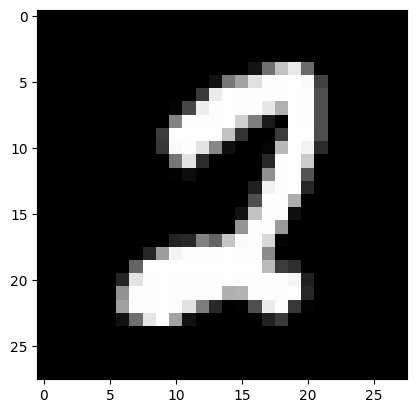

Image 70:
True Label: 9, Predicted Label: 9


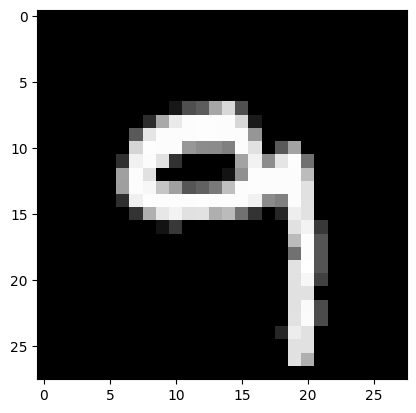

Image 71:
True Label: 3, Predicted Label: 3


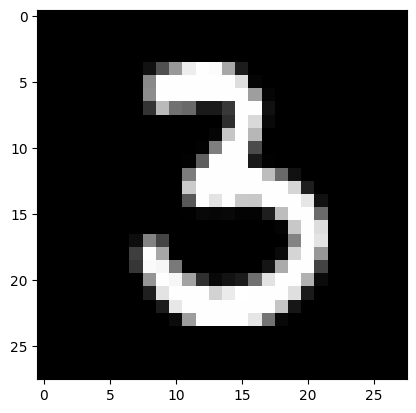

Image 72:
True Label: 2, Predicted Label: 2


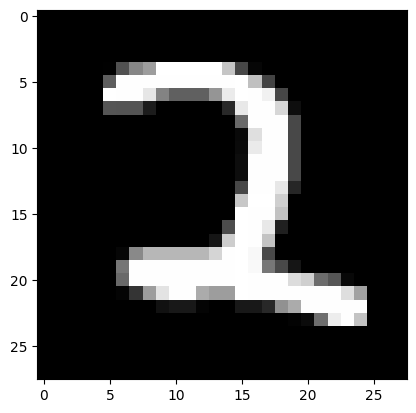

Image 73:
True Label: 7, Predicted Label: 7


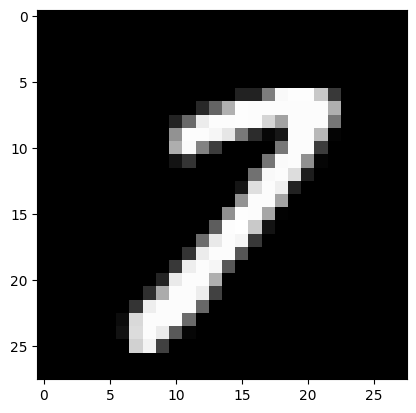

Image 74:
True Label: 2, Predicted Label: 6


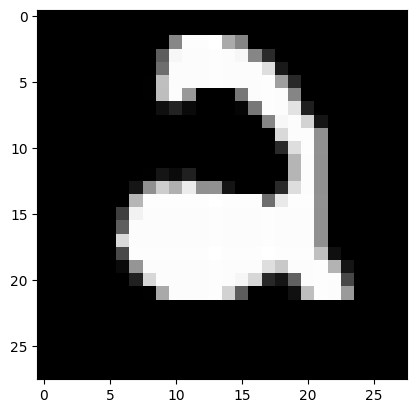

Image 75:
True Label: 5, Predicted Label: 5


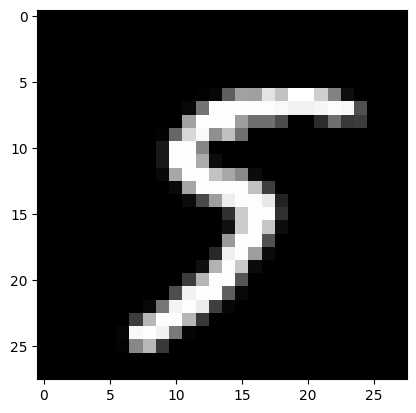

Image 76:
True Label: 3, Predicted Label: 3


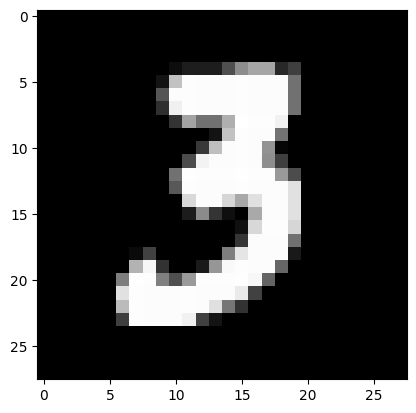

Image 77:
True Label: 0, Predicted Label: 0


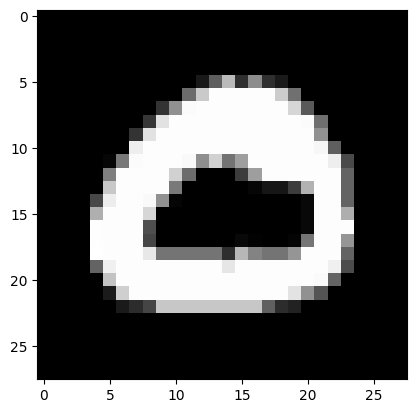

Image 78:
True Label: 5, Predicted Label: 5


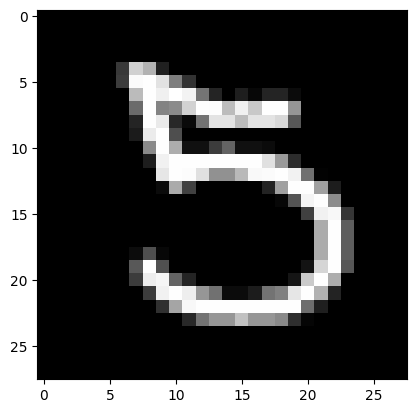

Image 79:
True Label: 9, Predicted Label: 9


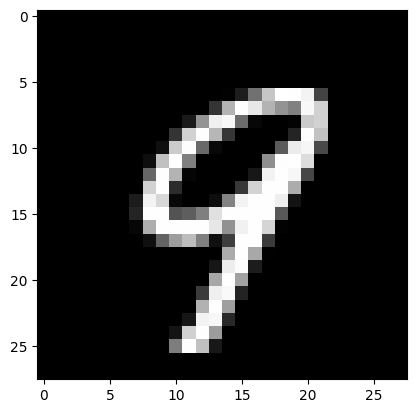

Image 80:
True Label: 6, Predicted Label: 6


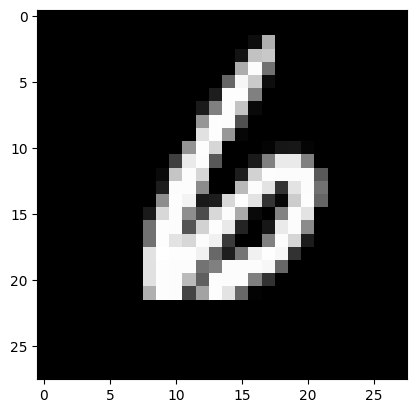

Image 81:
True Label: 4, Predicted Label: 4


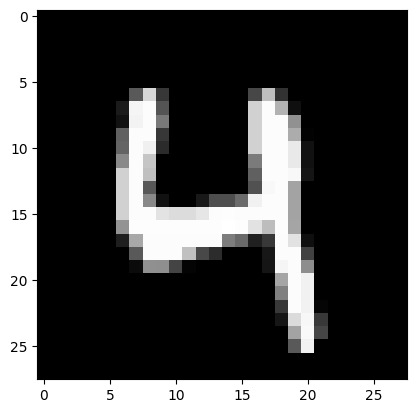

Image 82:
True Label: 5, Predicted Label: 6


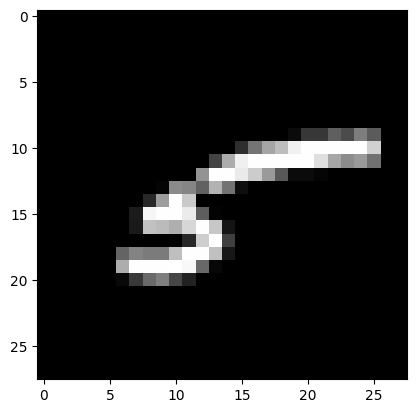

Image 83:
True Label: 6, Predicted Label: 6


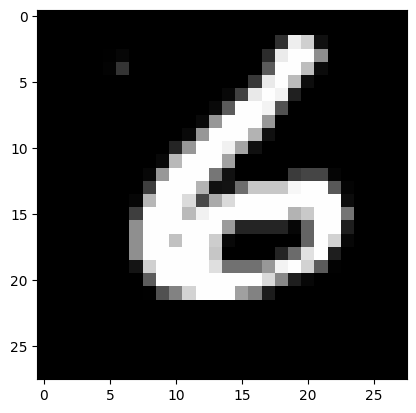

Image 84:
True Label: 1, Predicted Label: 1


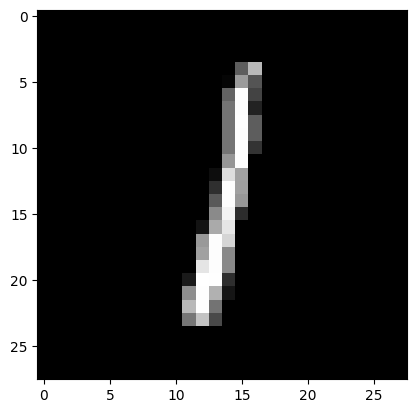

Image 85:
True Label: 4, Predicted Label: 4


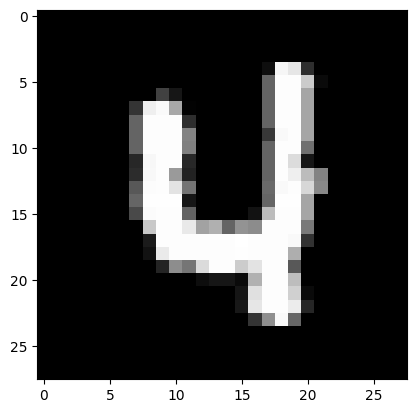

Image 86:
True Label: 2, Predicted Label: 2


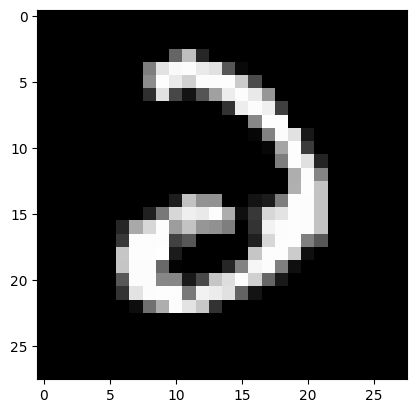

Image 87:
True Label: 2, Predicted Label: 2


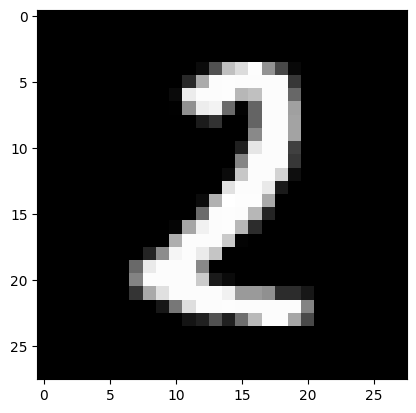

Image 88:
True Label: 1, Predicted Label: 1


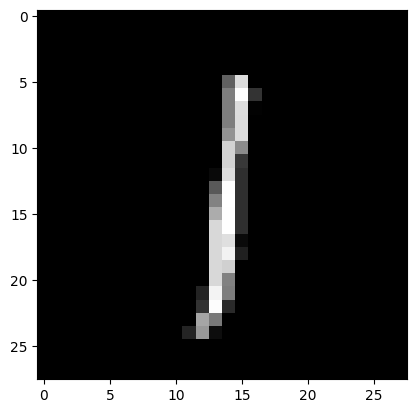

Image 89:
True Label: 3, Predicted Label: 3


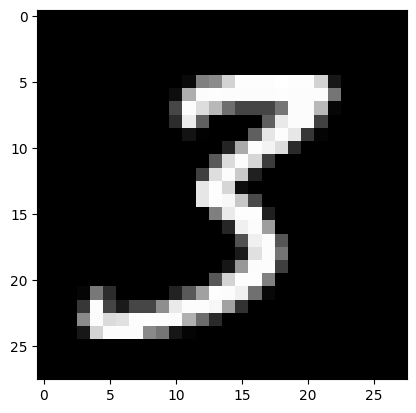

Image 90:
True Label: 5, Predicted Label: 5


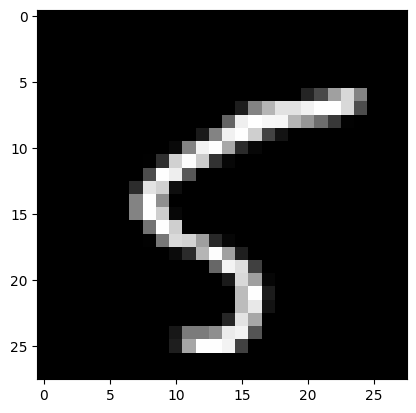

Image 91:
True Label: 7, Predicted Label: 7


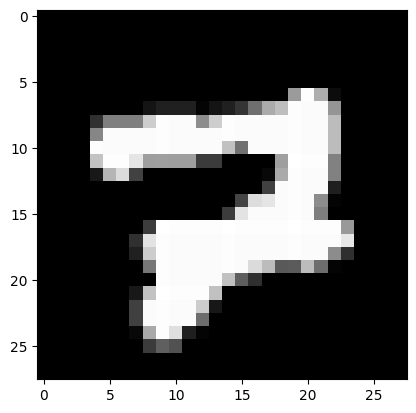

Image 92:
True Label: 1, Predicted Label: 1


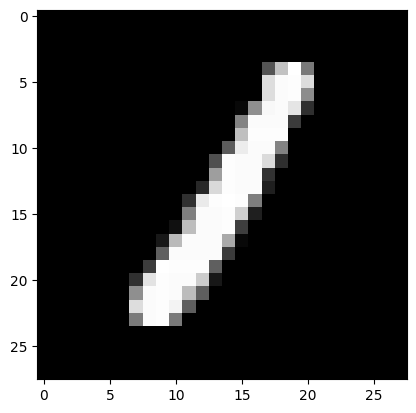

Image 93:
True Label: 3, Predicted Label: 3


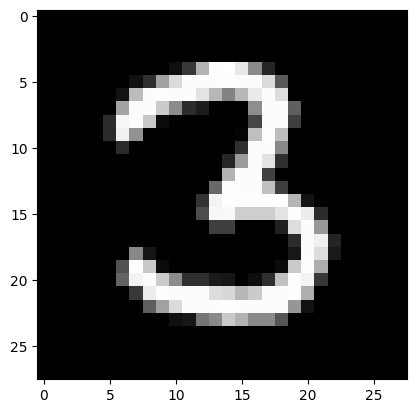

Image 94:
True Label: 8, Predicted Label: 8


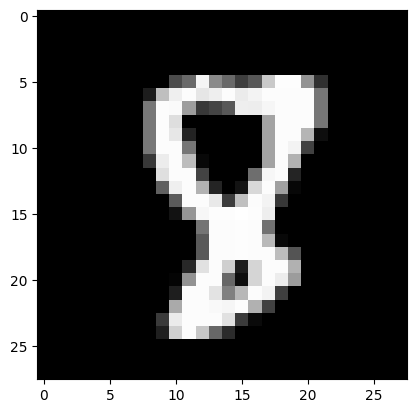

Image 95:
True Label: 3, Predicted Label: 3


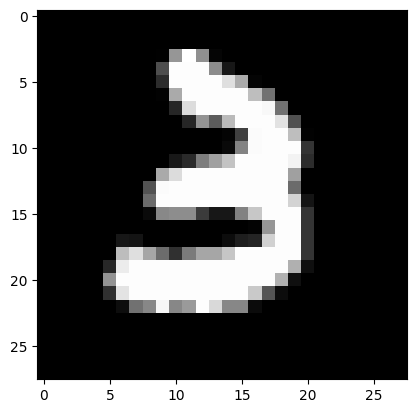

Image 96:
True Label: 8, Predicted Label: 5


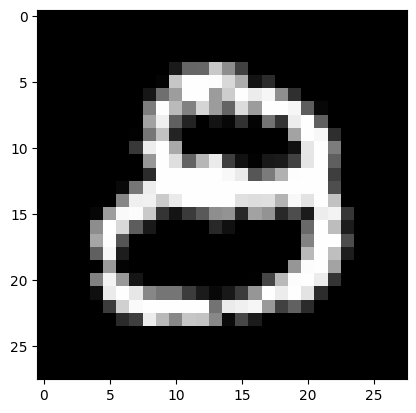

Image 97:
True Label: 1, Predicted Label: 1


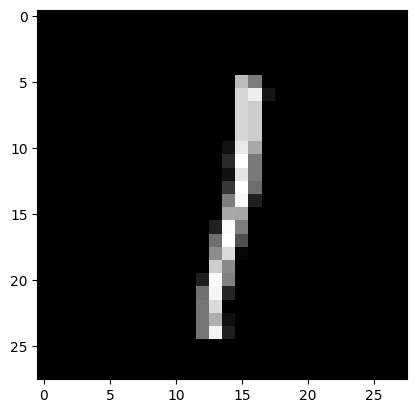

Image 98:
True Label: 1, Predicted Label: 1


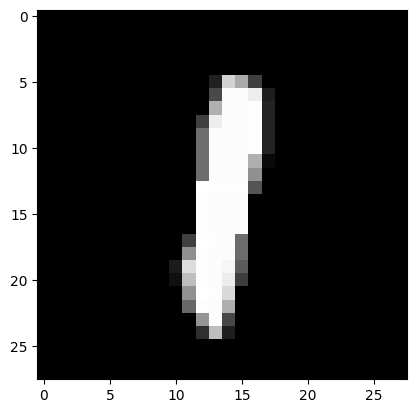

Image 99:
True Label: 1, Predicted Label: 1


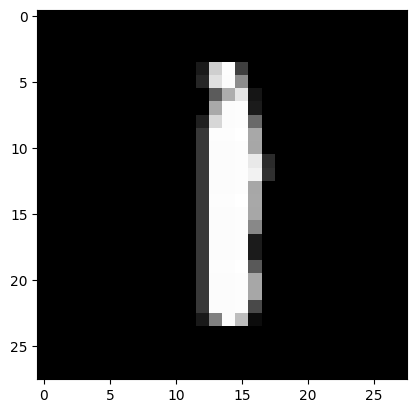

Image 100:
True Label: 0, Predicted Label: 0


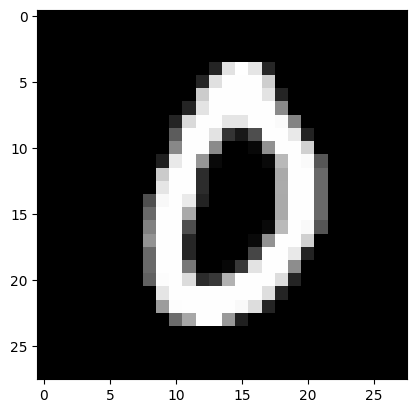

0.88

In [53]:
def evaluate_on_test_set(X_test, Y_test, W1, b1, W2, b2):
    """
    Evaluate the trained model on the test set, printing images, their labels, and predictions.

    Args:
    X_test -- Test set features (input data)
    Y_test -- True labels for the test set
    W1, b1, W2, b2 -- Trained weights and biases of the neural network

    Returns:
    accuracy -- The accuracy of the model on the test set
    """
    # Forward pass to get predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test)

    # Predicted labels
    predictions = get_predictions(A2)

    # Calculating accuracy on test set
    accuracy = get_accuracy(predictions, Y_test)

    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Print each image, true label, and prediction
    for i in range(X_test.shape[1]):  # Loop through all test samples
        current_image = X_test[:, i, None]  # Get one test image
        true_label = Y_test[i]  # True label
        predicted_label = predictions[i]  # Model's prediction

        print(f"Image {i+1}:")
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

        current_image = current_image.reshape((28, 28))  * 255 # Rescale image
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()  # Show the image

    return accuracy
X_test_100 = X_train[:, :100]  # images
Y_test_100 = Y_train[:100]     # labels

# Now, evaluate on this subset of 100 images
evaluate_on_test_set(X_test_100, Y_test_100, W1, b1, W2, b2)


## **Conclusion**
This project demonstrated a basic implementation of a neural network to classify handwritten digits. Although simple, it provides insights into the workings of a neural network.
